In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from tabulate import tabulate
from urllib.parse import urlparse, parse_qsl

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mongoengine.queryset.visitor import Q
import django
from django.db.models import Count
sys.path.append('/home/galm/software/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
from tmv_app.models import *
from django.db.models import F

In [2]:
runs = RunStats.objects.filter(query=1366).annotate(
    topics = models.Count('topic')
)
df =  pd.DataFrame.from_dict(list(runs.values()))
df.head()

,batch_count,docs_seen,error,errortype,iterations,last_update,max_features,method,ngram,notes,query_id,run_id,start,term_count,topic_scores_current,topic_titles_current,topic_year_scores_current,topics
0,0,143463,326.783821,Frobenius,4,2017-07-08 14:39:05.412168+00:00,50000,nm,1,None,1366,189,2017-07-08 10:04:36.035275+00:00,23744,True,True,True,220
1,0,143463,325.494428,Frobenius,4,2017-07-08 20:08:39.524924+00:00,50000,nm,1,None,1366,190,2017-07-08 14:39:06.102799+00:00,23744,True,True,True,240
2,0,143463,327.338230,Frobenius,4,2017-07-09 14:23:52.046556+00:00,50000,nm,1,None,1366,193,2017-07-09 09:33:14.474373+00:00,23744,True,True,True,300
3,0,143463,326.945150,Frobenius,4,2017-07-09 09:33:14.439021+00:00,50000,nm,1,None,1366,192,2017-07-09 02:42:08.743195+00:00,23744,True,True,True,280
4,0,143463,324.981778,Frobenius,4,2017-07-09 02:42:08.719681+00:00,50000,nm,1,None,1366,191,2017-07-08 20:08:39.546153+00:00,23744,True,True,True,260


In [3]:
ndf = df.sort_values(by='topics', ascending=1).reset_index(drop=True)

colorset=["#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4","#66c2a5","#3288bd"]
plt.rcParams["figure.figsize"] = [16,10]
gndf = ndf.groupby(['max_features','ngram'])
ps = []
gs = []
i = 0
for name,group in gndf:
    p = plt.plot(group['topics'],group['error'],color=colorset[i])
    plt.scatter(group['topics'],group['error'],color=colorset[i])
    m = group[group['topics']==150]
    plt.text(
        m['topics'],
        m['error'],name
    )
    ps.append(p[0])
    gs.append(name)
    i+=1
#p1 = plt.plot(ndf['topics'],ndf[ndf[max_features==5000]]['error'],color='#fbb4ae')
#p2 = plt.plot(ndf['topics'],ndf['iterations'],color='#b3cde3')
plt.legend((ps),(gs))

plt.show()

TypeError: cannot convert the series to <class 'float'>

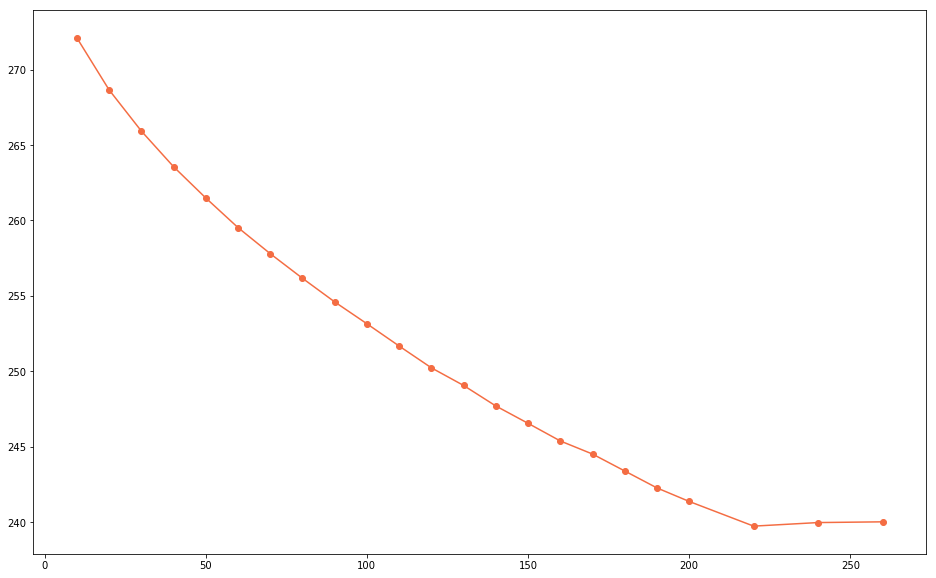

In [5]:
ndf = df.sort_values(by='topics', ascending=1).reset_index(drop=True)

#colorset=["#d53e4f","#f46d43","#fdae61","#fee08b","#e6f598","#abdda4","#66c2a5","#3288bd"]
plt.rcParams["figure.figsize"] = [16,10]
p = plt.plot(ndf['topics'],ndf['error'],color=colorset[i])
p = plt.scatter(ndf['topics'],ndf['error'],color=colorset[i])

plt.savefig('../plots/model_error.png',bbox_inches='tight') 
plt.show()